<img src="banner.png" width="60%">

In [ ]:
# Ana Mantilla: anagmd2019@gmail.com
# Paul Goyes: goyes.yesid@gmail.com

# LIBRARIES

In [1]:
from pyvista import set_plot_theme
set_plot_theme('document')

# Import necessary libraries
import gempy as gp
import gempy_viewer as gpv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from gempy_engine.core.data.stack_relation_type import StackRelationType
import pickle

Setting Backend To: AvailableBackends.numpy


In [2]:
extent = [0, 2000, 0, 1000, -1000, 0]
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='GrabenModel',
    extent= extent,
    resolution=[100,100,100],
    structural_frame=gp.data.StructuralFrame.initialize_default_structure())

# SURFACE 1

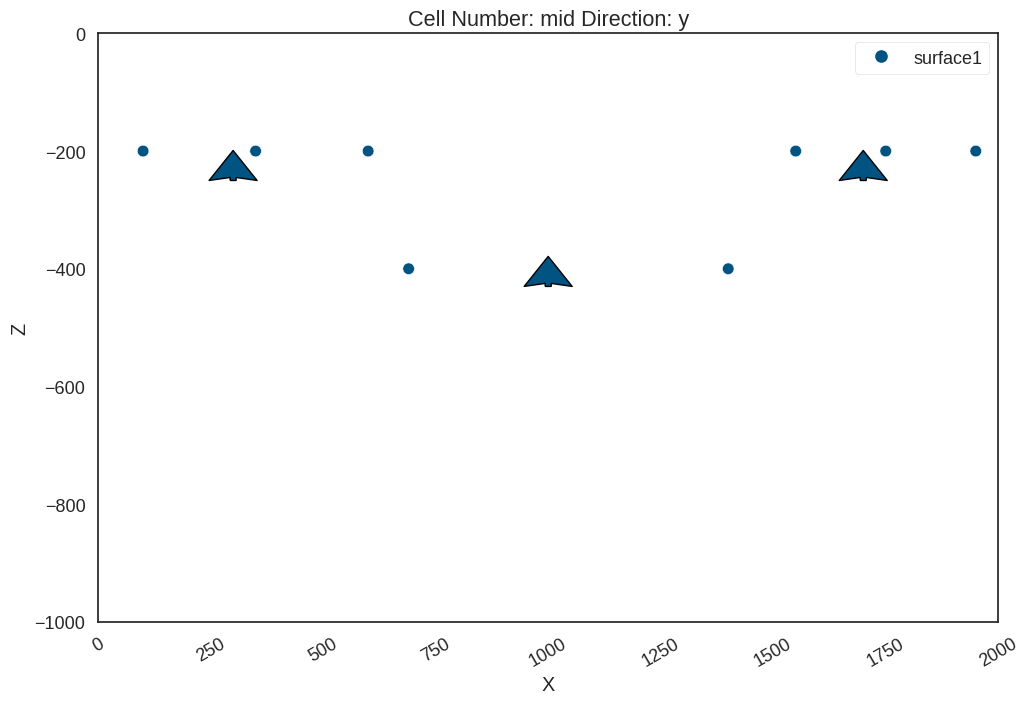

In [3]:
gp.add_surface_points(
    geo_model=geo_model,
    x=[100,600,690,1400,350,1550,1950,1750,1000],
    y=[500,500,500,500,500,500,500,500,500],
    z=[-200,-200,-400,-400,-200,-200,-200,-200,-400],
    elements_names=['surface1','surface1','surface1','surface1','surface1','surface1','surface1','surface1','surface1']
)

gp.add_orientations(
    geo_model=geo_model,
    x=[300,1000,1700],
    y=[500,500,500],
    z=[-250,-430,-250],
    elements_names=['surface1', 'surface1', 'surface1'],
    pole_vector=[[0, 0, 1], [0, 0, 1], [0, 0, 1]]
)

gpv.plot_2d(geo_model, show=False)

In [4]:
geo_model.update_transform(gp.data.GlobalAnisotropy.NONE)

gp.compute_model(gempy_model=geo_model,
                       engine_config=gp.data.GemPyEngineConfig(backend=gp.data.AvailableBackends.PYTORCH))

Setting Backend To: AvailableBackends.PYTORCH
Chunking done: 41 chunks


Solutions(4 Octree Levels, 1 DualContouringMeshes)

/home/hdspgeo/anaconda3/envs/gempy2024/lib/python3.12/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


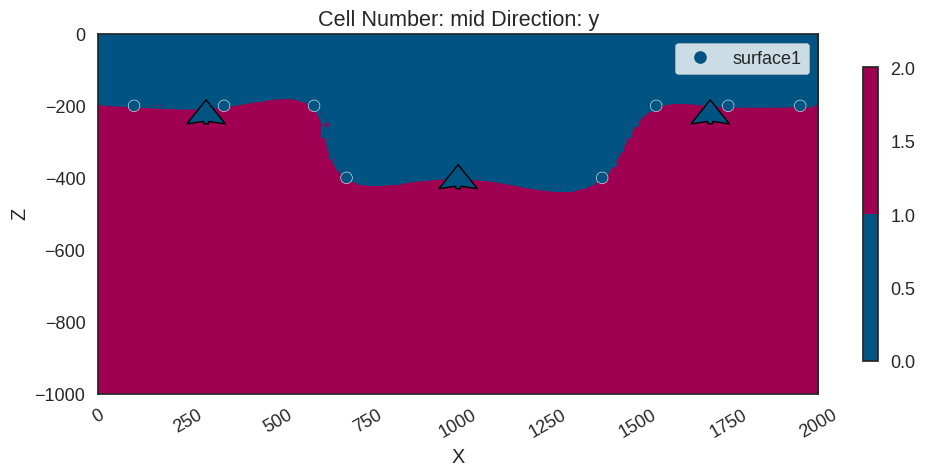

In [5]:
gpv.plot_2d(geo_model)
#gpv.plot_3d(geo_model)

# SURFACE 2

/home/hdspgeo/anaconda3/envs/gempy2024/lib/python3.12/site-packages/gempy/core/data/structural_frame.py:206: UserWarning: The basement color was already used in the structural elements.Changing the basement color to #ffbe00.
  warnings.warn(f"The basement color was already used in the structural elements."


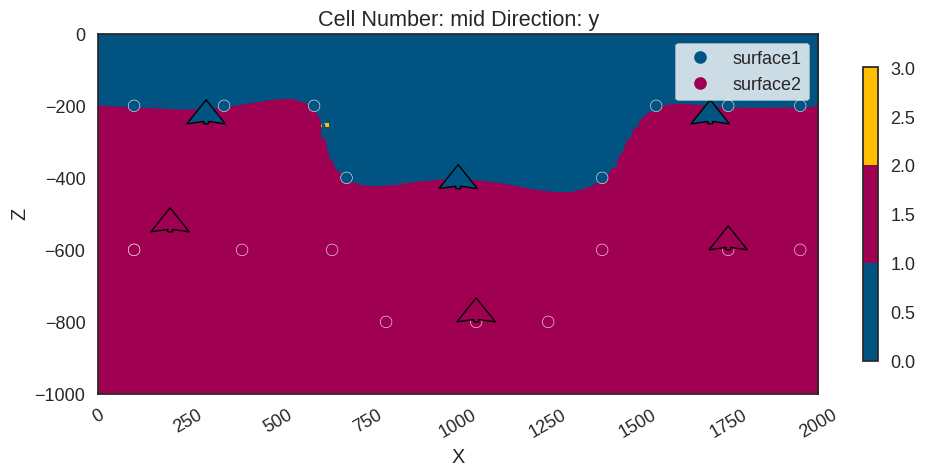

In [6]:
element2 = gp.data.StructuralElement(
    name='surface2',
    color=next(geo_model.structural_frame.color_generator),
    surface_points=gp.data.SurfacePointsTable.from_arrays(
        x=np.array([100,800,1250,400,100,650,1400,1950,1750,1050]),
        y=np.array([500,500,500,500,500,500,500,500,500,500]),
        z=np.array([-600,-800,-800,-600,-600,-600,-600,-600,-600,-800]),
        names='surface2'
    ),
    orientations=gp.data.OrientationsTable.initialize_empty()
)

geo_model.structural_frame.structural_groups[0].append_element(element2)

gp.add_orientations(
    geo_model=geo_model,
    x=[200,1050,1750],
    y=[500,500,500],
    z=[-550,-800,-600],
    elements_names=['surface2', 'surface2', 'surface2'],
    pole_vector=[[0, 0, 1], [0, 0, 1], [0, 0, 1]]
)

gpv.plot_2d(geo_model)

In [7]:
gp.compute_model(gempy_model=geo_model,
                       engine_config=gp.data.GemPyEngineConfig(backend=gp.data.AvailableBackends.PYTORCH))

Setting Backend To: AvailableBackends.PYTORCH
Chunking done: 77 chunks


Solutions(4 Octree Levels, 2 DualContouringMeshes)

/home/hdspgeo/anaconda3/envs/gempy2024/lib/python3.12/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


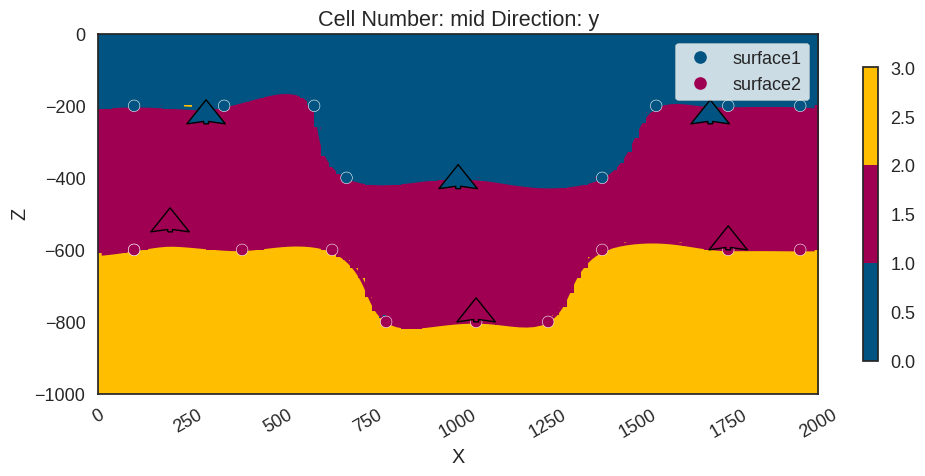

In [8]:
# visualize the updated model:
gpv.plot_2d(geo_model)
#gpv.plot_3d(geo_model)

# GEOLOGICAL FAULTS

### FAULT 1

/home/hdspgeo/anaconda3/envs/gempy2024/lib/python3.12/site-packages/gempy/core/data/structural_frame.py:206: UserWarning: The basement color was already used in the structural elements.Changing the basement color to #728f02.
  warnings.warn(f"The basement color was already used in the structural elements."


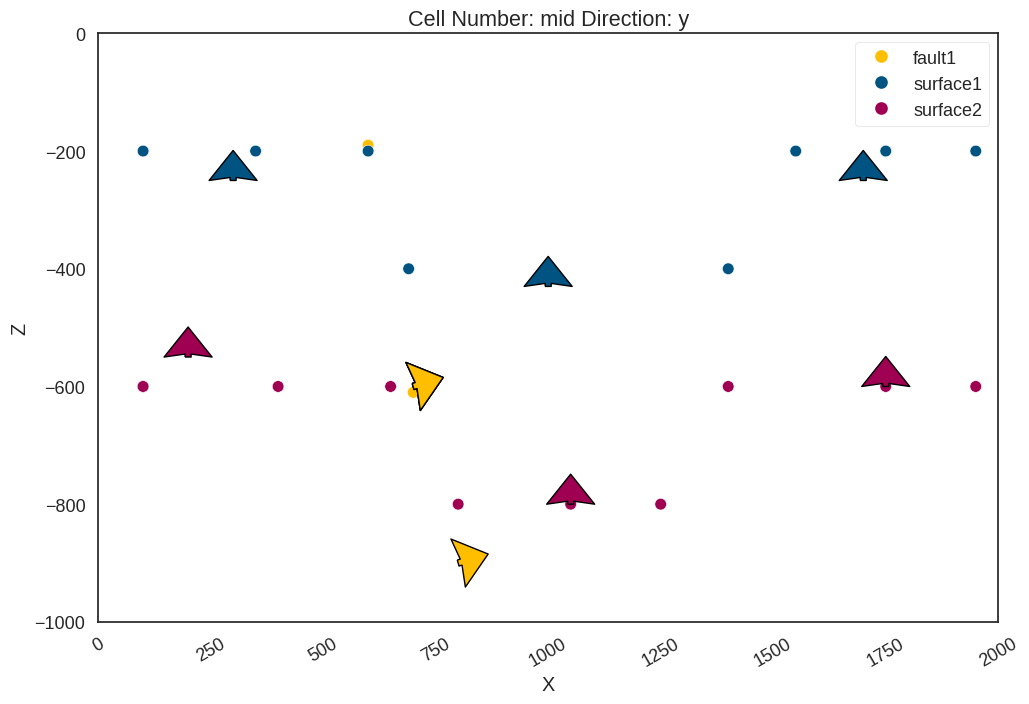

In [9]:
element_fault = gp.data.StructuralElement(
    name='fault1',
    color=next(geo_model.structural_frame.color_generator),
    surface_points=gp.data.SurfacePointsTable.from_arrays(
        x=np.array([600, 700]),
        y=np.array([500, 500]),
        z=np.array([-190, -610]),
        names='fault1'
    ),
    orientations=gp.data.OrientationsTable.from_arrays(
        x=np.array([700,700,700,800]),
        y=np.array([500,100,900,500]),
        z=np.array([-600,-600,-600,-900]),
        G_x=np.array([1,1,1,1]),
        G_y=np.array([0,0,0,0]),
        G_z=np.array([.3,.3,.3,.3]),
        names='fault1'
    )
)

# Add a new group for the fault
gp.add_structural_group(
    model=geo_model,
    group_index=0,
    structural_group_name="fault1",
    elements=[element_fault],
    structural_relation=gp.data.StackRelationType.FAULT,
    fault_relations=gp.data.FaultsRelationSpecialCase.OFFSET_ALL
)

# Preview the model's input data:
gpv.plot_2d(geo_model, show_results=False)

### FAULT 2

/home/hdspgeo/anaconda3/envs/gempy2024/lib/python3.12/site-packages/gempy/core/data/structural_frame.py:206: UserWarning: The basement color was already used in the structural elements.Changing the basement color to #443988.
  warnings.warn(f"The basement color was already used in the structural elements."


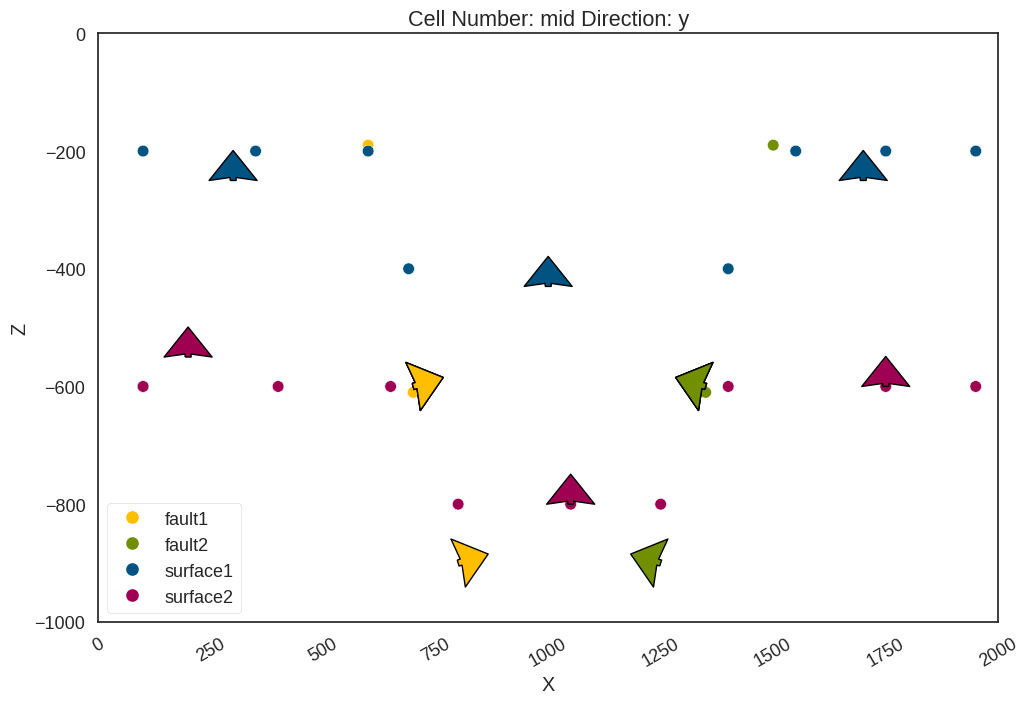

In [10]:
element_fault2 = gp.data.StructuralElement(
    name='fault2',
    color=next(geo_model.structural_frame.color_generator),
    surface_points=gp.data.SurfacePointsTable.from_arrays(
        x=np.array([1500,1350]),
        y=np.array([500,500]),
        z=np.array([-190,-610]),
        names='fault2'
    ),
    orientations=gp.data.OrientationsTable.from_arrays(
        x=np.array([1350,1350,1350,1250]),
        y=np.array([500,100,900,500]),
        z=np.array([-600,-600,-600,-900]),
        G_x=np.array([-1,-1,-1,-1]),
        G_y=np.array([0,0,0,0]),
        G_z=np.array([.3,.3,.3,.3]),
        names='fault2'
    )
)

gp.add_structural_group(
    model=geo_model,
    group_index=1,
    structural_group_name="fault2",
    elements=[element_fault2],
    structural_relation=gp.data.StackRelationType.FAULT,
    fault_relations=gp.data.FaultsRelationSpecialCase.OFFSET_ALL
)

# Preview the model's input data:
gpv.plot_2d(geo_model, show_results=False)

In [11]:
gp.compute_model(gempy_model=geo_model,
                       engine_config=gp.data.GemPyEngineConfig(backend=gp.data.AvailableBackends.PYTORCH))

Setting Backend To: AvailableBackends.PYTORCH
Chunking done: 33 chunks
Chunking done: 35 chunks
Chunking done: 81 chunks


Solutions(4 Octree Levels, 4 DualContouringMeshes)

/home/hdspgeo/anaconda3/envs/gempy2024/lib/python3.12/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


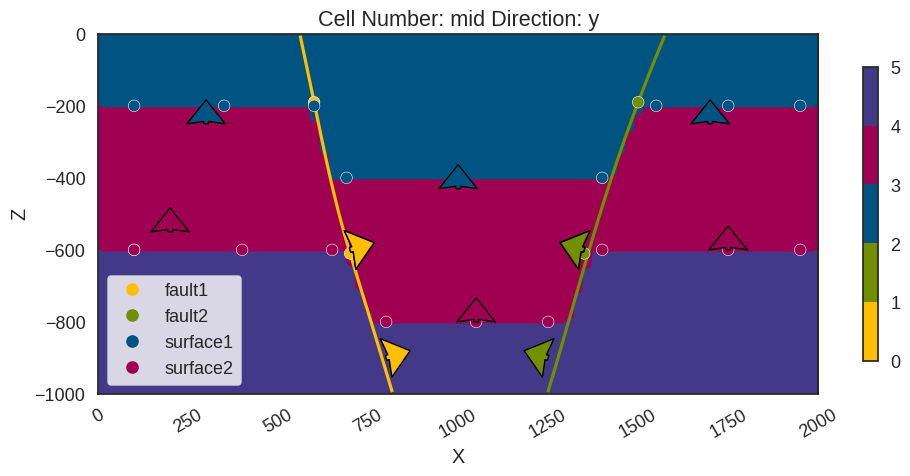

In [12]:
gpv.plot_2d(geo_model)
#gpv.plot_3d(geo_model)

### SETTING FAULT

In [13]:
gp.set_is_fault(geo_model, ['fault1','fault2'])

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=fault1,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=fault1,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=fault2,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=fault2,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=default_formations,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=surface1,
	color=#015482,
	is_active=True
),
Element(
	name=surface2,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False,  True],
 [False, False,  True],
 [False, False, False]],

In [14]:
gp.compute_model(gempy_model=geo_model,
                       engine_config=gp.data.GemPyEngineConfig(backend=gp.data.AvailableBackends.PYTORCH))

Setting Backend To: AvailableBackends.PYTORCH
Chunking done: 33 chunks
Chunking done: 33 chunks
Chunking done: 81 chunks


Solutions(4 Octree Levels, 4 DualContouringMeshes)

/home/hdspgeo/anaconda3/envs/gempy2024/lib/python3.12/site-packages/gempy_viewer/API/_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


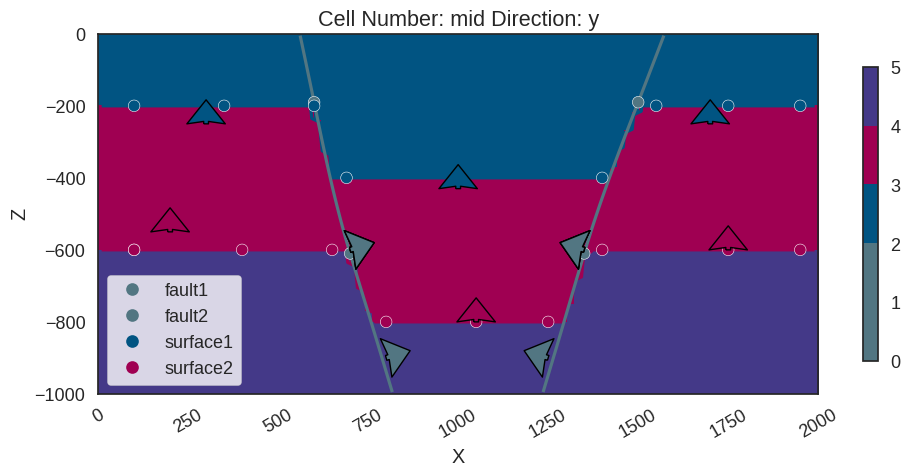

In [15]:
gpv.plot_2d(geo_model)
#gpv.plot_3d(geo_model)

### SAVE 3D MODEL

In [17]:
pickle.dump(geo_model, open("graben_3d.p", "wb"))

In [ ]:
#geo_model = pickle.load(open("graben_3d.p", "rb"))